<a href="https://colab.research.google.com/github/CheronoK/Hypothesis-Testing/blob/master/Cherono_Week_4_IP_DS_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 4 INDEPENDENT PROJECT

## 1. Import libraries

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

## 2. Loading the dataset

In [124]:
#Loading our dataset
url = 'http://bit.ly/DSCoreAutolibDataset'
df = pd.read_csv(url)
df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [125]:
#Loading the data description
df_description = pd.read_excel('/content/columns_explanation.xlsx')
df_description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


## 3. Initial Exploration of the dataset 

In [126]:
#Previewing the top of the dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [127]:
#Previewing the bottom of the dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [128]:
#Check the shape of our dataset
df.shape
#the data has 16,085 rows and 13 columns

(16085, 13)

In [129]:
#checking the datatypes of each column
df.dtypes

#The dataset contains object and integer datatypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [130]:
#Displaying the number of unique elements in each column
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [131]:
#Checking for any duplicates in the dataset
df.duplicated().sum()

0

In [132]:
#Counting the number of entries in each column
df.count()

Postal code               16085
date                      16085
n_daily_data_points       16085
dayOfWeek                 16085
day_type                  16085
BlueCars_taken_sum        16085
BlueCars_returned_sum     16085
Utilib_taken_sum          16085
Utilib_returned_sum       16085
Utilib_14_taken_sum       16085
Utilib_14_returned_sum    16085
Slots_freed_sum           16085
Slots_taken_sum           16085
dtype: int64

In [133]:
#Checking the number of null values in each column
df.isnull().sum()

#There are no null values in our dataset

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

## 4. Cleaning the Data

In [134]:
#Droppig the columns that we won't need in our analysis
df.drop(columns=['Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum'], axis =1, inplace = True)
df.columns

#These columns belong to the Utilib and Utilib 14 cars which we won't be looking into as the analysis is of the blue cars 

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Slots_freed_sum',
       'Slots_taken_sum'],
      dtype='object')

In [135]:
#Cleaning the column names

#Removing spaces from the column names and replacing it with an underscore
df.columns = df.columns.str.replace(" ","_")
#Changing the names of the columns to lowercase
df.columns = map(str.lower, df.columns)
list(df.columns)

['postal_code',
 'date',
 'n_daily_data_points',
 'dayofweek',
 'day_type',
 'bluecars_taken_sum',
 'bluecars_returned_sum',
 'slots_freed_sum',
 'slots_taken_sum']

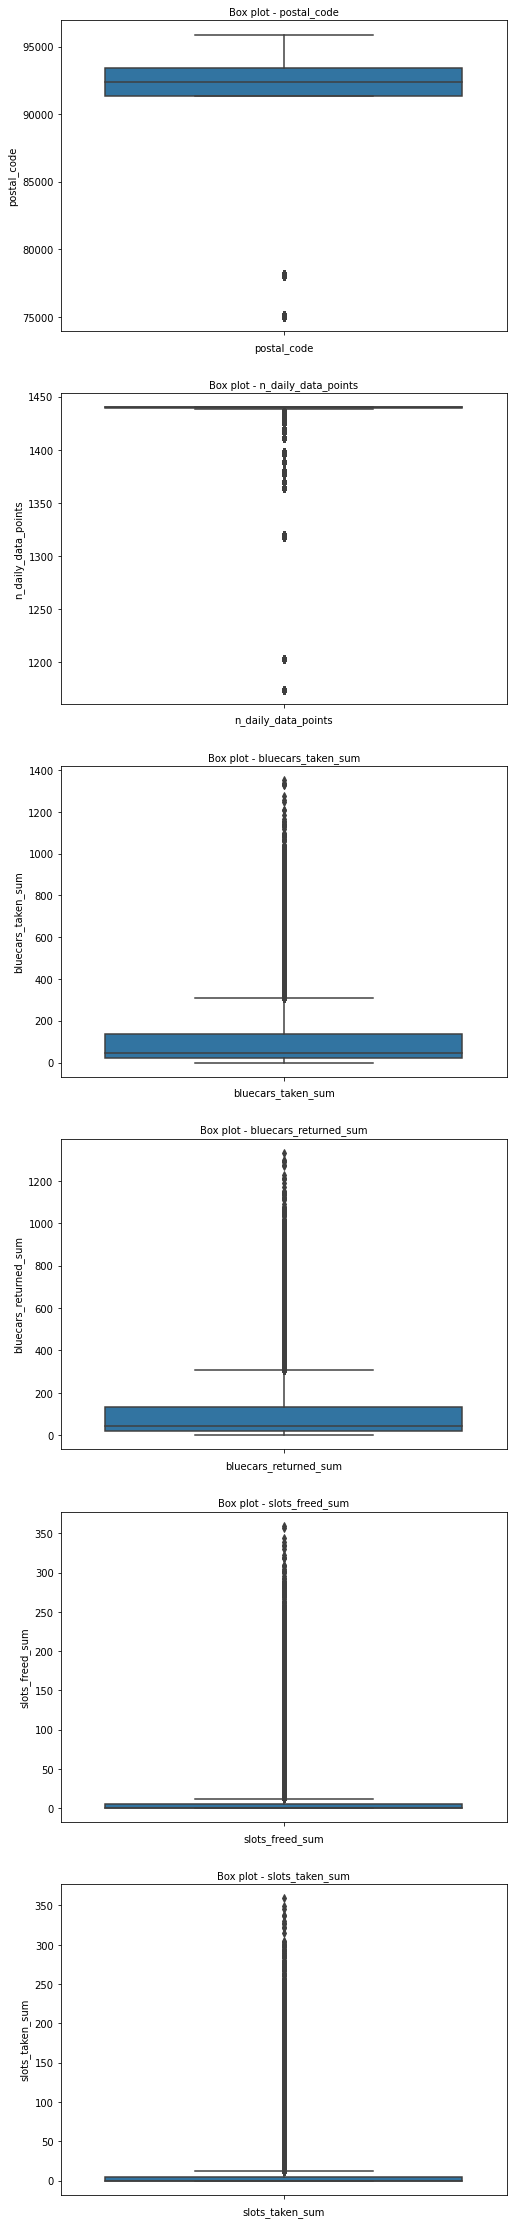

In [136]:
#Checking for outliers
col_names = ['postal_code','n_daily_data_points','bluecars_taken_sum','bluecars_returned_sum','slots_freed_sum','slots_taken_sum']
fig,ax = plt.subplots(len(col_names),figsize=(8,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=df[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

We can see outliers in each of the variables. The outliers comprises of a huge part of the data. Removing them would result to removal of a huge chunk of the dataset. We, therefore won't remove them.

## 5. Univariate Analysis

In [137]:
#Displaying the summary statistics of the dataframe
df.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,360.000000,359.000000


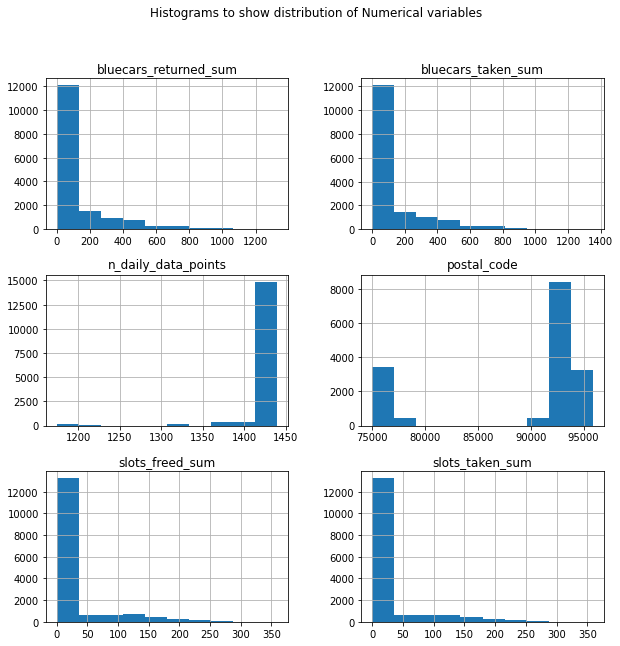

In [138]:
#Plotting the distribution of each of the numerical variables
df.drop(['dayofweek', 'day_type'],axis=1).hist(bins=10, figsize=(10,10))
plt.suptitle('Histograms to show distribution of Numerical variables')
plt.show()

From the above analysis, we can tell that the sum of the blue cars taken, returned, slots freed and the slots taken are all skewed to the right.

However, the number of daily points and postal codes are skewed to the left. The distribution of postal codes is almost symetrical.

In [139]:
#Calculating the measures of dispersion for the blue cars taken
print('The standard deviation is:',df['bluecars_returned_sum'].std())
print('The variance is:',df['bluecars_returned_sum'].var())
print('The skewness is:',df['bluecars_returned_sum'].skew())
print('The kurtois is:',df['bluecars_returned_sum'].kurt())

df_max = df['bluecars_returned_sum'].max()
df_min = df['bluecars_returned_sum'].min()
print('The range is:',df_max - df_min)

The standard deviation is: 185.50153480148427
The variance is: 34410.819413706275
The skewness is: 2.412084978838923
The kurtois is: 6.1862880957582345
The range is: 1332


In [140]:
#Calculating the measures of dispersion for the blue cars returned
print('The standard deviation is:',df['bluecars_taken_sum'].std())
print('The variance is:',df['bluecars_taken_sum'].var())
print('The skewness is:',df['bluecars_taken_sum'].skew())
print('The kurtois is:',df['bluecars_taken_sum'].kurt())

df_max = df['bluecars_taken_sum'].max()
df_min = df['bluecars_taken_sum'].min()
print('The range is:',df_max - df_min)

The standard deviation is: 185.42657876727893
The variance is: 34383.01611333789
The skewness is: 2.4063548974959086
The kurtois is: 6.172692305510042
The range is: 1352


The skewness is positive implying the distribution is skewed to the right.

The kurtosis is greater than zero hence this is a leptokurtic distribution implying that the distribution is heavy(outlier is present) and higher than that of a normal distribution

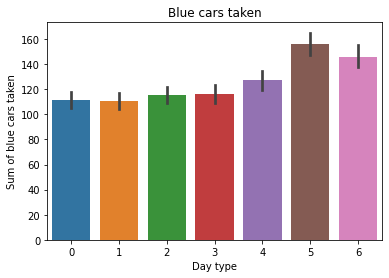

In [141]:
#Plotting a barplot of the sum of the blue cars taken throughout the week
sns.barplot(df['dayofweek'], df['bluecars_taken_sum'])
plt.title('Blue cars taken')
plt.xlabel('Day type')
plt.ylabel('Sum of blue cars taken')
plt.show()

The number of blue cars taken is very high on days that are on the weekend and low on weekdays.

The barplot below also depicts the same for the blue cars returned; it rises as the week commmences to the weekend.

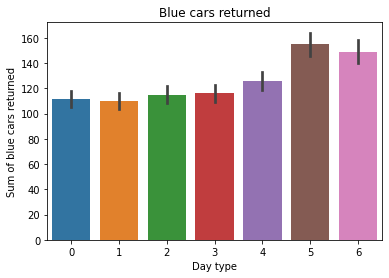

In [142]:
#Bar plot for blue cars returned
sns.barplot(df['dayofweek'], df['bluecars_returned_sum'])
plt.title('Blue cars returned')
plt.xlabel('Day type')
plt.ylabel('Sum of blue cars returned')
plt.show()

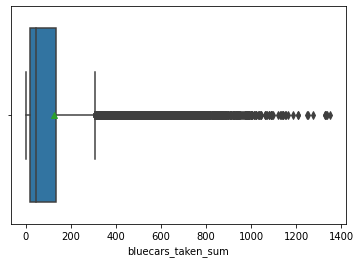

In [143]:
#Plotting a box plot to show distribution of the blue cars taken
sns.boxplot(df['bluecars_taken_sum'], showmeans=True)

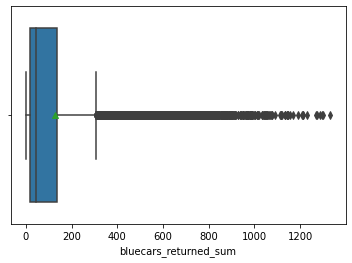

In [144]:
#Plotting a box plot to show distribution of the blue cars returned
sns.boxplot(df['bluecars_returned_sum'], showmeans=True)

The above box plots depicts that the distribution is heavy(outlier is present) and higher than that of a normal distribution

## 6. Bivariate Analysis

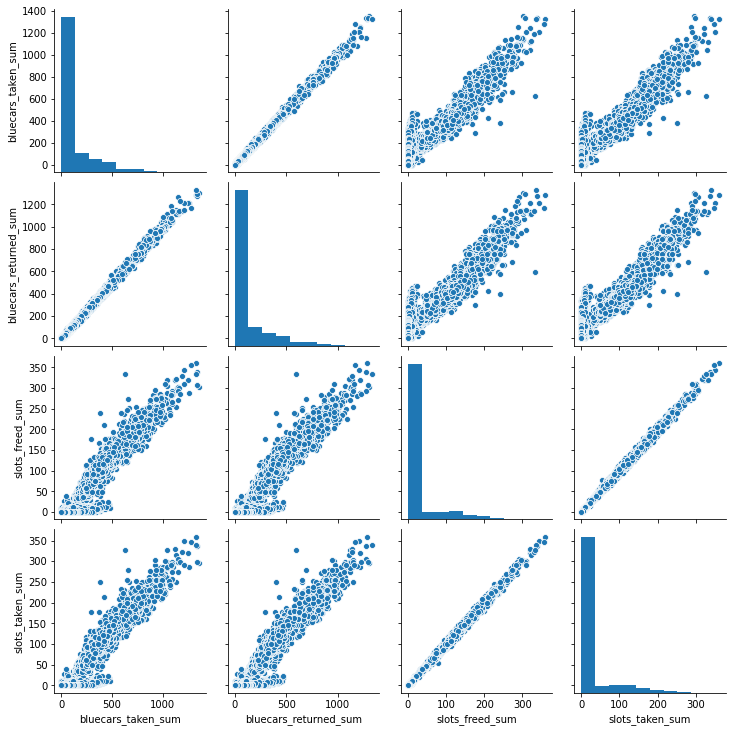

In [145]:
#PLotting a pairplot to show the different relations between different numerical variables
columns = ['bluecars_taken_sum','bluecars_returned_sum','slots_freed_sum','slots_taken_sum']
sns.pairplot(df[columns])

The above pairplot depicts a strong relation between the variables

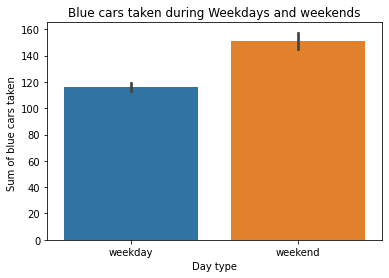

In [146]:
#Plotting a bar chart for the blue cars taken during different day types
sns.barplot(df['day_type'], df['bluecars_taken_sum'])
plt.title('Blue cars taken during Weekdays and weekends')
plt.xlabel('Day type')
plt.ylabel('Sum of blue cars taken ')
plt.show()

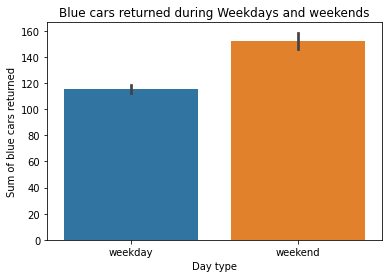

In [147]:
#Plotting a bar chart for the blue cars returned during different day types
sns.barplot(df['day_type'], df['bluecars_returned_sum'])
plt.title('Blue cars returned during Weekdays and weekends')
plt.xlabel('Day type')
plt.ylabel('Sum of blue cars returned')
plt.show()

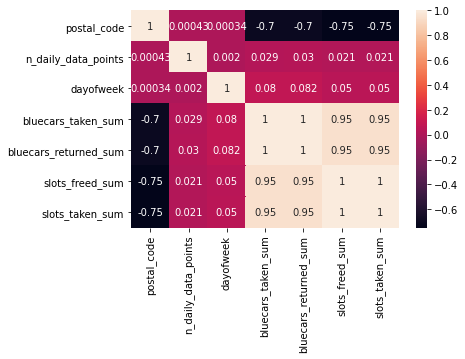

In [149]:
#Plottting a heatmap to show correlation of different numerical variables
sns.heatmap(df.corr(), xticklabels = df.corr().columns, yticklabels = df.corr().columns, annot=True)

The above heatmap shows that most of the variables are moderately correlated although there are instances of weekly correlation and strong correlation.

## 7. Sampling

In [234]:
#Choosing a sample from our dataset
#Using sample Random sampling to select our sample
#We'll take 1000 samples in this case
df_sample = df.sample(n=1600, replace = "True")
df_sample.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
1187,75008,4/9/2018,1440,0,weekday,465,449,148,143
5584,92160,5/22/2018,1438,1,weekday,24,27,0,0
6342,92220,4/19/2018,1203,3,weekday,34,37,0,0
5260,92140,4/29/2018,1440,6,weekend,48,60,0,0
6374,92220,6/1/2018,1440,4,weekday,74,81,6,5


In [235]:
#Choosing two postal codes using simple random sampling to compare two different areas
df3 = df_sample.sample(n=2, replace = "False")
df3.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
13314,94110,2/6/2018,1439,1,weekday,42,42,0,0
9005,92400,5/24/2018,1436,3,weekday,119,126,3,3


In [236]:
#Choosing only weekdays to focus on in our sample
df4 = df_sample[(df_sample.day_type == 'weekday')]
df4

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
1187,75008,4/9/2018,1440,0,weekday,465,449,148,143
5584,92160,5/22/2018,1438,1,weekday,24,27,0,0
6342,92220,4/19/2018,1203,3,weekday,34,37,0,0
6374,92220,6/1/2018,1440,4,weekday,74,81,6,5
9426,92500,3/28/2018,1440,2,weekday,118,130,0,0
...,...,...,...,...,...,...,...,...,...
14217,94220,1/4/2018,1320,3,weekday,32,32,0,0
3144,75112,1/25/2018,1398,3,weekday,11,12,1,1
13381,94110,4/17/2018,1440,1,weekday,35,35,0,0
13387,94110,4/23/2018,1417,0,weekday,29,30,0,0


In [239]:
#Creating a dataset with only the 75004 postal code
df5 = df4[df4.postal_code == 94110]
df5

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
13402,94110,5/8/2018,1425,1,weekday,48,47,0,0
13302,94110,1/25/2018,1398,3,weekday,51,48,0,0
13360,94110,3/27/2018,1440,1,weekday,27,30,0,0
13352,94110,3/19/2018,1440,0,weekday,36,39,0,0
13398,94110,5/4/2018,1435,4,weekday,32,34,0,0
13345,94110,3/12/2018,1440,0,weekday,36,36,0,0
13314,94110,2/6/2018,1439,1,weekday,42,42,0,0
13390,94110,4/26/2018,1440,3,weekday,30,36,0,0
13381,94110,4/17/2018,1440,1,weekday,35,35,0,0
13387,94110,4/23/2018,1417,0,weekday,29,30,0,0


In [240]:
#Creating another dataset with only the 93500 postal code
df6 = df4[df4.postal_code == 92400]
df6

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
9005,92400,5/24/2018,1436,3,weekday,119,126,3,3
8992,92400,4/30/2018,1440,0,weekday,94,93,4,4
9004,92400,5/23/2018,1174,2,weekday,86,79,4,3
8890,92400,1/15/2018,1440,0,weekday,107,109,5,4
9009,92400,5/28/2018,1440,0,weekday,97,101,5,5
8964,92400,4/2/2018,1439,0,weekday,103,107,3,3
8951,92400,3/20/2018,1440,1,weekday,102,102,7,7
8894,92400,1/19/2018,1440,4,weekday,102,101,2,2
8915,92400,2/9/2018,1439,4,weekday,79,82,4,5
8878,92400,1/3/2018,1439,2,weekday,107,97,0,0


## 8. Hypothesis Testing

In [248]:
#Calculating the z score for calculating the mean of the two samples
import math as m
#Calculating the mean of the blue cars returned
mean1 = df5['bluecars_returned_sum'].mean()
mean2 = df6['bluecars_returned_sum'].mean()
#Calculating the mean difference
mean_difference = mean1 - mean2
#Calculating the standard deviation of the two samples
std1 = df5['bluecars_returned_sum'].std()
std2 = df6['bluecars_returned_sum'].std()
#Calculating the number of rows in each 
n1 = len(df5.index)
n2 = len(df6.index)
z_score = (mean1 - mean2 - mean_difference)/m.sqrt((std1/n1)+(std2/n2))
zscore

-0.2610303508257427

In [260]:
#Calculating the p value
pval = stats.norm.cdf(zscore)
print(pval)
#Using an alpha level of 0.05
if pval < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept the null hypothesis")

0.3970345509143982
Reject null hypothesis


In [249]:
#Interpreting the null hypothesis using the test statistics
from statsmodels.stats import weightstats as stests
ztest , pval1 = stests.ztest(x1 = df5['bluecars_returned_sum'], x2= df6['bluecars_returned_sum'], value= mean_difference, alternative='two-sided')
if pval1 < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept the null hypothesis")

Accept the null hypothesis
